In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("csv/credit_card_transactions.csv")

In [3]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['year'] = df['trans_date_trans_time'].dt.year
df['weekday'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month_name()

In [6]:
df.describe()

,Unnamed: 0,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,hour,year
count,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,2019-10-03 12:47:28.070214144,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04,1.280486e+01,2.019287e+03
min,0.000000e+00,2019-01-01 00:00:18,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03,0.000000e+00,2.019000e+03
25%,3.241685e+05,2019-06-03 19:12:22.500000,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04,7.000000e+00,2.019000e+03
50%,6.483370e+05,2019-10-03 07:35:47,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04,1.400000e+01,2.019000e+03
75%,9.725055e+05,2020-01-28 15:02:55.500000,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04,1.900000e+01,2.020000e+03
max,1.296674e+06,2020-06-21 12:13:37,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04,2.300000e+01,2.020000e+03
std,3.743180e+05,NaN,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04,6.817824e+00,4.522452e-01


In [7]:
df.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
hour                          0
year                          0
weekday                       0
month                         0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode', 'hour', 'year',
       'weekday', 'month'],
      dtype='object')

trans_date_trans_time: fecha transacción
cc_num: Número de tarjeta de crédito
merchant: Comerciante o tienda donde se realizó la transacción.
category: Tipo de transacción
amt: Importe de la transacción.
first: Nombre del titular de la tarjeta.
last: Apellido del titular de la tarjeta.
gender: Género del titular de la tarjeta.
street: Datos de la dirección del titular de la tarjeta.
city: Datos de la dirección del titular de la tarjeta.
state: Datos de la dirección del titular de la tarjeta.
zip: Codigo postal titular.
lat: Coordenadas geográficas de la transacción.
long: Coordenadas geográficas de la transacción.
city_pop: Población de la ciudad donde se realizó la transacción.
job: Ocupación del titular de la tarjeta.
dob: Fecha de nacimiento del titular de la tarjeta.
trans_num: Número de transacción único.
unix_time: Marca de tiempo Unix de la transacción.
merch_lat: Coordenadas geográficas del comerciante.
merch_long: Coordenadas geográficas del comerciante.
is_fraud: Indicador de si la transacción es fraudulenta.
merch_zipcode: Codigo postal comerciante.

In [9]:
df['merchant'].value_counts()

merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

In [10]:
df['amt'].value_counts()

amt
1.14       542
1.04       538
1.25       535
1.02       533
1.01       523
          ... 
2090.14      1
540.62       1
578.42       1
816.57       1
280.17       1
Name: count, Length: 52928, dtype: int64

In [11]:
df['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [12]:
df['gender'].value_counts()

gender
F    709863
M    586812
Name: count, dtype: int64

In [13]:
df['city'].value_counts()

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Norfolk           7
Karns City        7
Streator          7
Claypool          7
Bruce             7
Name: count, Length: 894, dtype: int64

In [14]:
df['job'].value_counts()

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Veterinary surgeon               8
Information officer              8
Contracting civil engineer       7
Ship broker                      7
Warehouse manager                7
Name: count, Length: 494, dtype: int64

In [15]:
df['cc_num'].value_counts()

cc_num
4512828414983801773    3123
571365235126           3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
4734310647841293          7
4714017207228610634       7
6011732631674654          7
501894933032              7
4975457191020             7
Name: count, Length: 983, dtype: int64

In [16]:
df['state'].value_counts()

state
TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: count, dtype: int64

In [17]:
df['zip'].value_counts()

zip
73754    3646
34112    3613
48088    3597
82514    3527
49628    3123
         ... 
46510       7
23523       7
77027       7
95688       7
37411       7
Name: count, Length: 970, dtype: int64

In [18]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [19]:
df['trans_num'].value_counts()

trans_num
8f7c8e4ab7f25875d753b422917c98c9    1
0b242abb623afc578575680df30655b9    1
1f76529f8574734946361c461b024d99    1
710a88b3b93a13cab79aae87237a3ddf    1
b8a8575d70f33234cb53bb22b50a0fd9    1
                                   ..
6d294ed2cc447d2c71c7171a3d54967c    1
83ec1cc84142af6e2acf10c44949e720    1
189a841a0a8ba03058526bcfe566aab5    1
a41d7549acf90789359a9aa5346dcb46    1
6b849c168bdad6f867558c3793159a81    1
Name: count, Length: 1296675, dtype: int64

In [20]:
df['year'].value_counts()

year
2019    924850
2020    371825
Name: count, dtype: int64

In [21]:
df = df.drop(['Unnamed: 0', 'merch_zipcode'], axis=1)

# GRAFICAS

## GENEROS

In [22]:
female_transactions = df[df['gender'] == 'F']
male_transactions = df[df['gender'] == 'M']

In [23]:
category_transactions = female_transactions['category'].value_counts()
categories = category_transactions.index
transaction_counts = category_transactions.values

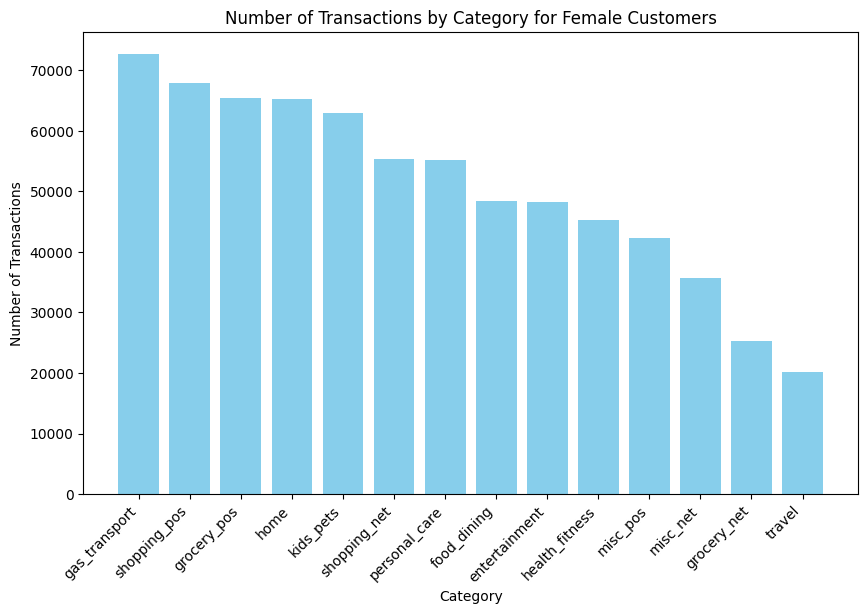

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(categories, transaction_counts, color='skyblue')
plt.title('Number of Transactions by Category for Female Customers')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')

plt.show()

In [25]:
category2_transactions = male_transactions['category'].value_counts()
categories2 = category2_transactions.index
transaction_counts2 = category2_transactions.values

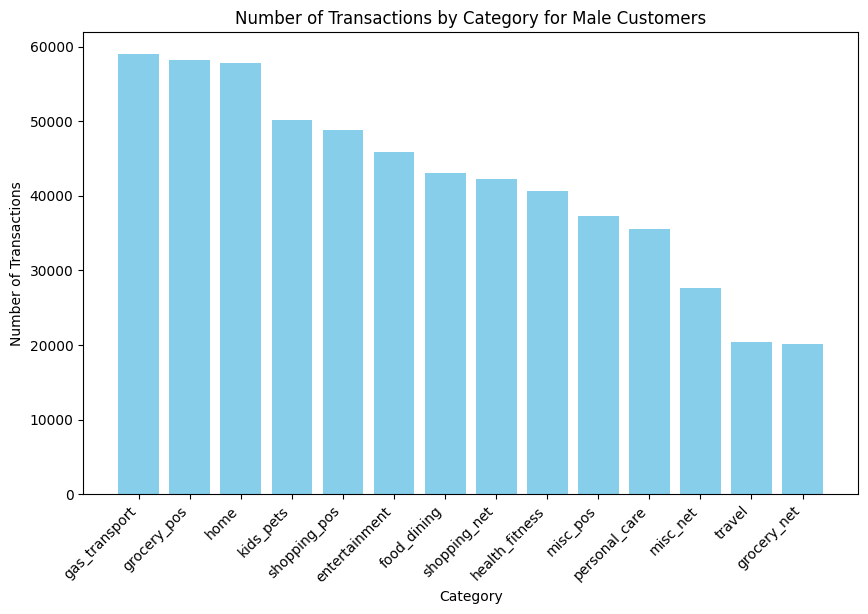

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(categories2, transaction_counts2, color='skyblue')
plt.title('Number of Transactions by Category for Male Customers')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')

plt.show()

/tmp/ipykernel_7942/940023539.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='amt', data=df_transaction_female, palette='viridis')


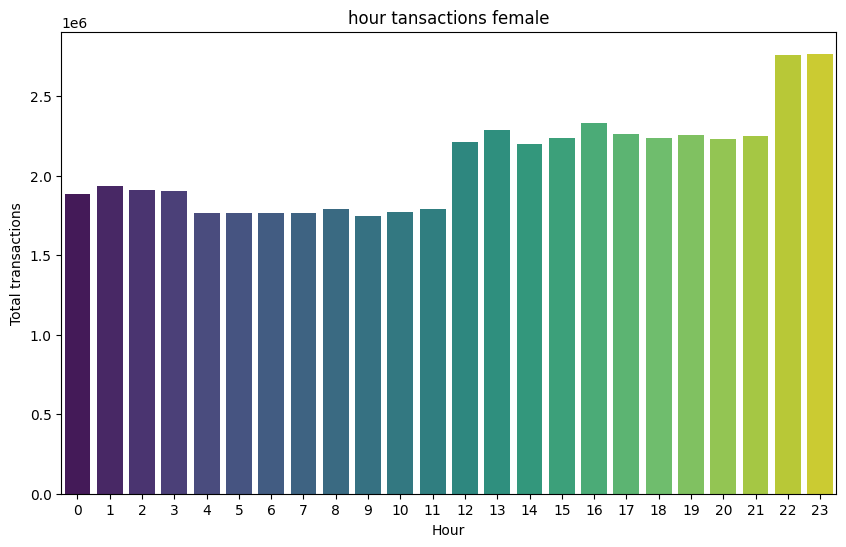

In [27]:
df_transaction_female = female_transactions.groupby('hour')['amt'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='amt', data=df_transaction_female, palette='viridis')
plt.title('hour tansactions female')
plt.xlabel('Hour')
plt.ylabel('Total transactions')

plt.show()

/tmp/ipykernel_7942/3498704538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='amt', data=df_transaction_male, palette='viridis')


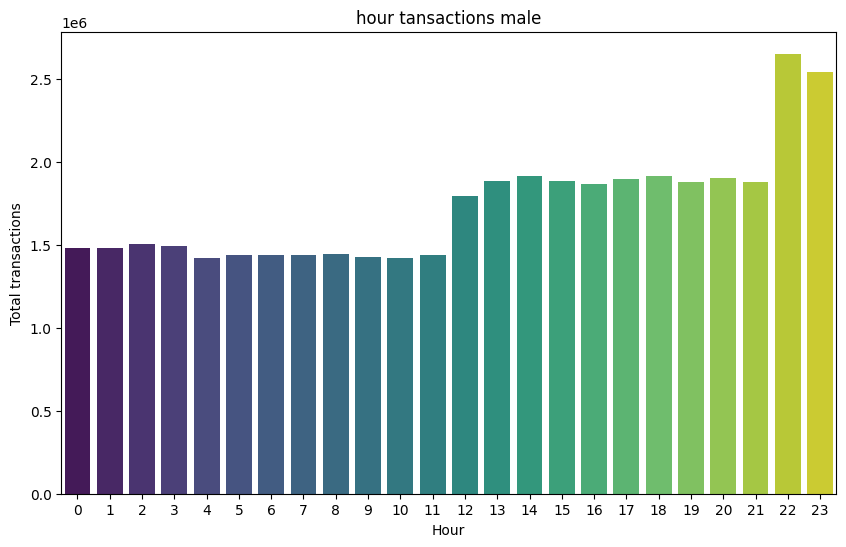

In [28]:
df_transaction_male = male_transactions.groupby('hour')['amt'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='amt', data=df_transaction_male, palette='viridis')
plt.title('hour tansactions male')
plt.xlabel('Hour')
plt.ylabel('Total transactions')

plt.show()

/tmp/ipykernel_7942/774289932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='amt', data=month_transaction_female, palette='viridis')


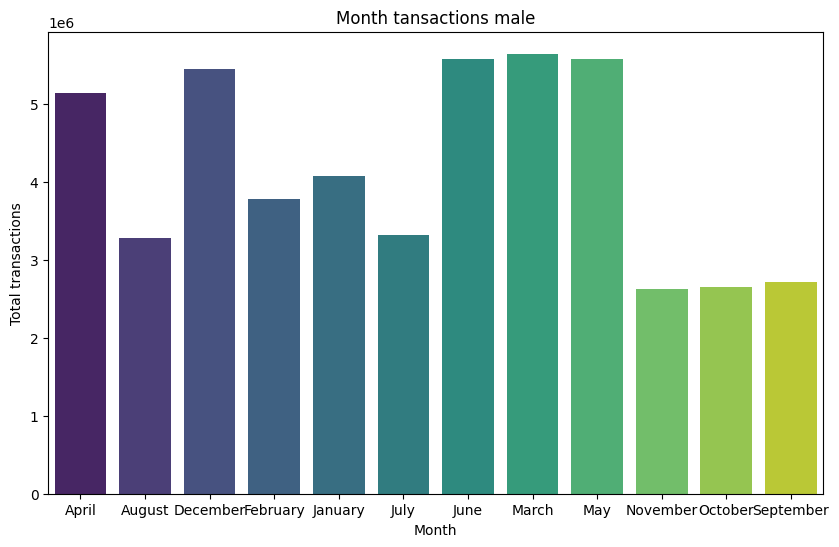

In [29]:
month_transaction_female = female_transactions.groupby('month')['amt'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='amt', data=month_transaction_female, palette='viridis')
plt.title('Month tansactions male')
plt.xlabel('Month')
plt.ylabel('Total transactions')

plt.show()

/tmp/ipykernel_7942/3470893980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='amt', data=month_transaction_male, palette='viridis')


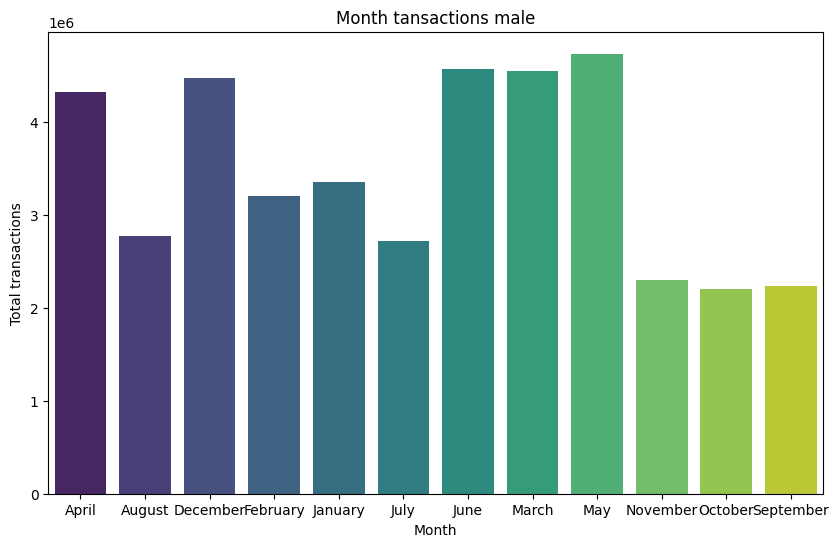

In [30]:
month_transaction_male = male_transactions.groupby('month')['amt'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='amt', data=month_transaction_male, palette='viridis')
plt.title('Month tansactions male')
plt.xlabel('Month')
plt.ylabel('Total transactions')

plt.show()

Tanto hombres como mujeres tienen gastos por horas y mensuales similares.

## State

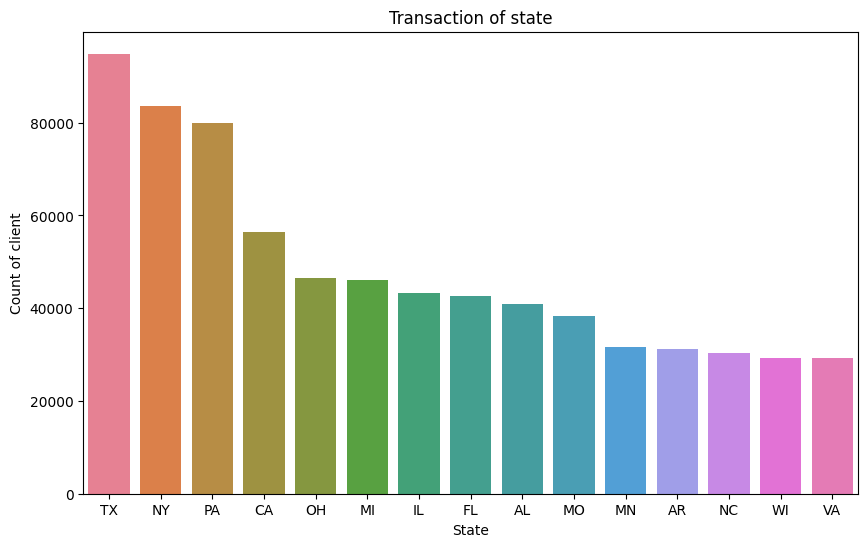

In [31]:
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'client_count']
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='client_count', data=state_counts.head(15), hue = 'state')
plt.title('Transaction of state')
plt.xlabel('State')
plt.ylabel('Count of client')

plt.show()

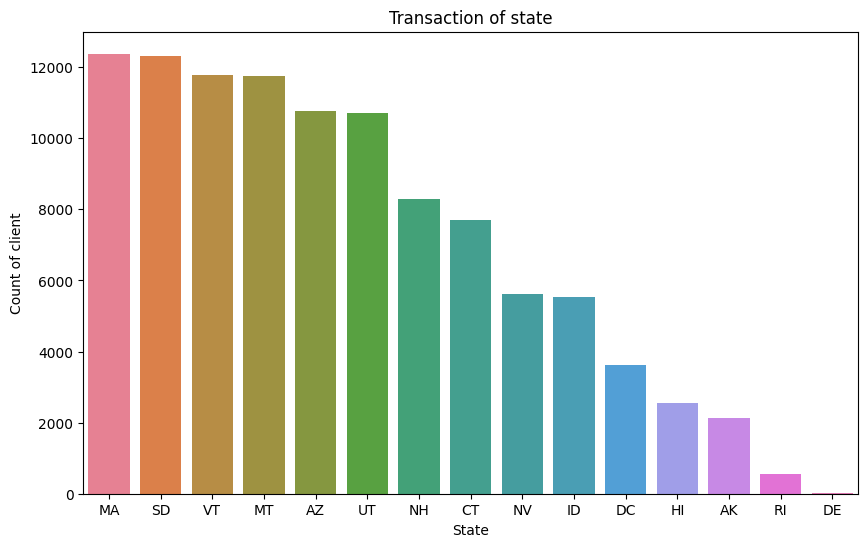

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='client_count', data=state_counts.tail(15), hue = 'state')
plt.title('Transaction of state')
plt.xlabel('State')
plt.ylabel('Count of client')

plt.show()

Se puede comprobar los 15 Estados en los que mas transacciones se hacen y los 15 Estados en los que menos transacciones se hacen.

# MERCHANT 

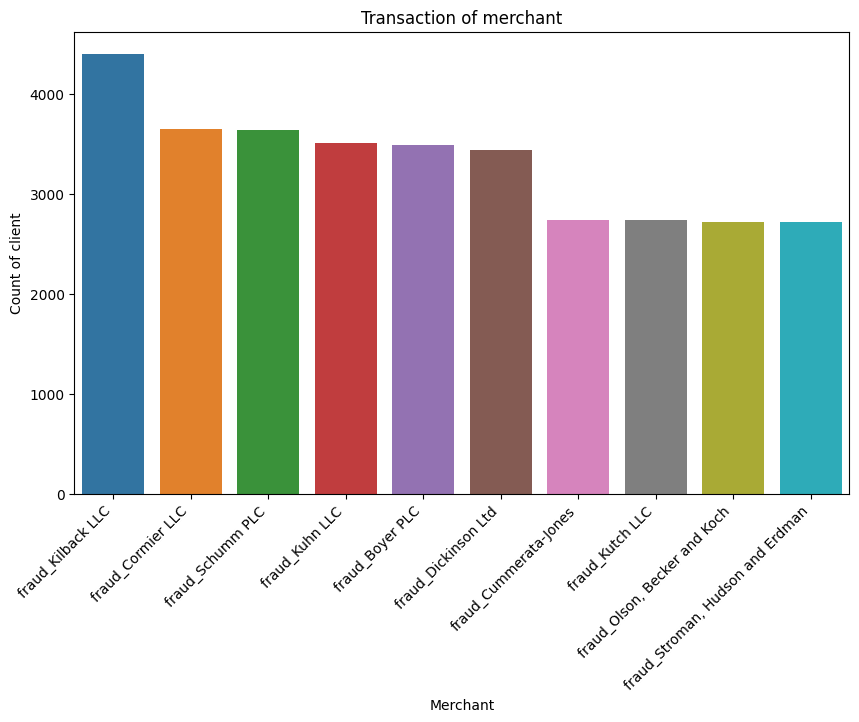

In [33]:
merchant_counts = df['merchant'].value_counts().reset_index()
merchant_counts.columns = ['merchant', 'client_count']
plt.figure(figsize=(10, 6))
sns.barplot(x='merchant', y='client_count', data=merchant_counts.head(10), hue = 'merchant')
plt.title('Transaction of merchant')
plt.xlabel('Merchant')
plt.ylabel('Count of client')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
Tiendas con más operaciones bancar

# Fraud

In [34]:
fraud_transactions = df[df['is_fraud'] == 1]

In [35]:
fraud = fraud_transactions['category'].value_counts()
fraud_categories = fraud.index
fraud_counts = fraud.values

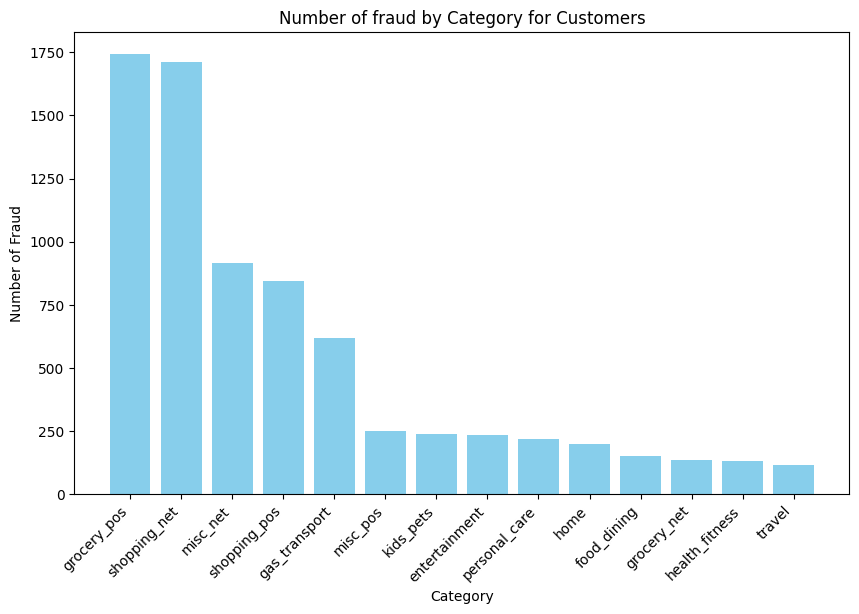

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(fraud_categories, fraud_counts, color='skyblue')
plt.title('Number of fraud by Category for Customers')
plt.xlabel('Category')
plt.ylabel('Number of Fraud')
plt.xticks(rotation=45, ha='right')

plt.show()